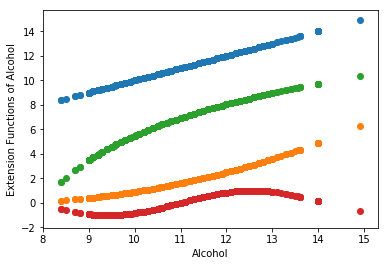

In [1]:
from urllib.request import urlopen
import matplotlib.pyplot as plot
from math import sqrt, cos, log

#read data into iterable
target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = urlopen(target_url)

xList = []
labels = []
names = []
firstLine = True
for line in data:
    line = line.decode()
    if firstLine:
        names = line.strip().split(";")
        firstLine = False
    else:
        #split on semi-colon
        row = line.strip().split(";")
        #put labels in separate array
        labels.append(float(row[-1]))
        #remove label from row
        row.pop()
        #convert row to floats
        floatRow = [float(num) for num in row]
        xList.append(floatRow)
        
#extend the alcohol variable (the last column in that attribute matrix
xExtended = []
alchCol = len(xList[1])

for row in xList:
    newRow = list(row)
    alch = row[alchCol - 1]
    newRow.append((alch - 7) * (alch - 7)/10)
    newRow.append(5 * log(alch - 7))
    newRow.append(cos(alch))
    xExtended.append(newRow)
    
nrow = len(xList)
v1 = [xExtended[j][alchCol - 1] for j in range(nrow)]

for i in range(4):
    v2 = [xExtended[j][alchCol - 1 + i] for j in range(nrow)]
    plot.scatter(v1,v2)

plot.xlabel("Alcohol")
plot.ylabel(("Extension Functions of Alcohol"))
plot.show()